In [23]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [7]:
df = pd.read_csv("archive/yahoo_stock.csv")
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index(keys=["Date"], inplace=True)
df.sort_index(inplace=True)

In [9]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...
2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039


In [10]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

<Axes: >

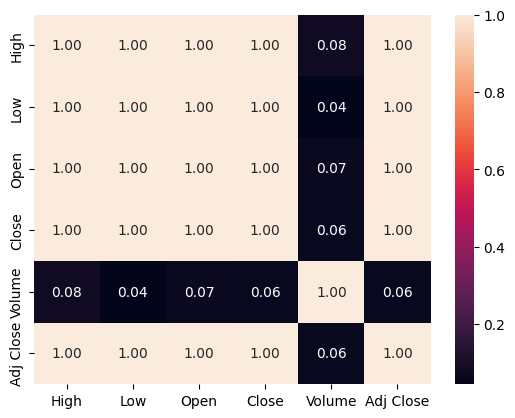

In [12]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [13]:
df = df[["Close"]].copy()

In [15]:
lag = 5
periods = range(lag, 0, -1)

In [16]:
df.shift(periods=periods)

,Close_5,Close_4,Close_3,Close_2,Close_1
Date,,,,,
2015-11-23,NaN,NaN,NaN,NaN,NaN
2015-11-24,NaN,NaN,NaN,NaN,2086.590088
2015-11-25,NaN,NaN,NaN,2086.590088,2089.139893
2015-11-26,NaN,NaN,2086.590088,2089.139893,2088.870117
2015-11-27,NaN,2086.590088,2089.139893,2088.870117,2088.870117
...,...,...,...,...,...
2020-11-16,3572.659912,3537.010010,3585.149902,3585.149902,3585.149902
2020-11-17,3537.010010,3585.149902,3585.149902,3585.149902,3626.909912
2020-11-18,3585.149902,3585.149902,3585.149902,3626.909912,3609.530029


In [17]:
df = pd.concat([df, df.shift(periods=periods)], axis=1)

In [18]:
df

,Close,Close_5,Close_4,Close_3,Close_2,Close_1
Date,,,,,,
2015-11-23,2086.590088,NaN,NaN,NaN,NaN,NaN
2015-11-24,2089.139893,NaN,NaN,NaN,NaN,2086.590088
2015-11-25,2088.870117,NaN,NaN,NaN,2086.590088,2089.139893
2015-11-26,2088.870117,NaN,NaN,2086.590088,2089.139893,2088.870117
2015-11-27,2090.110107,NaN,2086.590088,2089.139893,2088.870117,2088.870117
...,...,...,...,...,...,...
2020-11-16,3626.909912,3572.659912,3537.010010,3585.149902,3585.149902,3585.149902
2020-11-17,3609.530029,3537.010010,3585.149902,3585.149902,3585.149902,3626.909912
2020-11-18,3567.790039,3585.149902,3585.149902,3585.149902,3626.909912,3609.530029


In [19]:
df.dropna(axis=0, inplace=True)

In [20]:
df

,Close,Close_5,Close_4,Close_3,Close_2,Close_1
Date,,,,,,
2015-11-28,2090.110107,2086.590088,2089.139893,2088.870117,2088.870117,2090.110107
2015-11-29,2090.110107,2089.139893,2088.870117,2088.870117,2090.110107,2090.110107
2015-11-30,2080.409912,2088.870117,2088.870117,2090.110107,2090.110107,2090.110107
2015-12-01,2102.629883,2088.870117,2090.110107,2090.110107,2090.110107,2080.409912
2015-12-02,2079.510010,2090.110107,2090.110107,2090.110107,2080.409912,2102.629883
...,...,...,...,...,...,...
2020-11-16,3626.909912,3572.659912,3537.010010,3585.149902,3585.149902,3585.149902
2020-11-17,3609.530029,3537.010010,3585.149902,3585.149902,3585.149902,3626.909912
2020-11-18,3567.790039,3585.149902,3585.149902,3585.149902,3626.909912,3609.530029


In [21]:
X, y = df.drop(columns=["Close"]), df["Close"]

In [24]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

In [25]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [26]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [27]:
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(1456, 5, 1)

In [28]:
train_X = train_X.reshape(train_X.shape[0], lag, (train_X.shape[1] // lag))
test_X = test_X.reshape(test_X.shape[0], lag, (test_X.shape[1] // lag))

In [29]:
(train_X.shape[1], train_X.shape[2])

(5, 1)

In [67]:
model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(16, activation="relu", return_sequences=True),
    LSTM(16, activation="relu"),
    Dense(1, activation="linear")
])

In [68]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                       │ (None, 5, 16)               │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 16)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,281 (12.82 KB)

 Trainable params: 3,281 (12.82 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [70]:
history = model.fit(train_X, train_y, validation_split=0.20, epochs=8, batch_size=64, shuffle=False)

Epoch 1/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - loss: 0.1204 - mean_squared_error: 0.1204 - val_loss: 0.6297 - val_mean_squared_error: 0.6297
Epoch 2/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0884 - mean_squared_error: 0.0884 - val_loss: 0.4760 - val_mean_squared_error: 0.4760
Epoch 3/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.2848 - val_mean_squared_error: 0.2848
Epoch 4/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0784 - val_mean_squared_error: 0.0784
Epoch 5/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 6/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 7/8
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0052 - val_mean_

<Axes: >

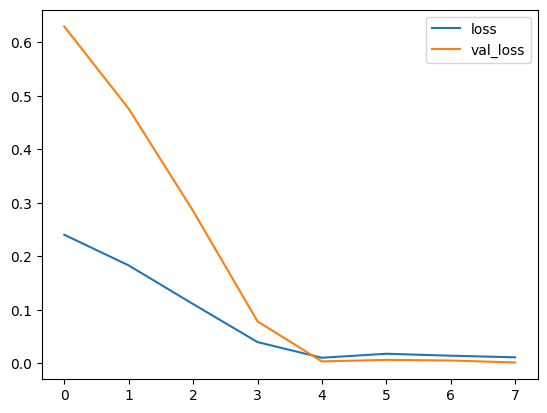

In [71]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [72]:
pred_y = model.predict(test_X)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


In [73]:
pred_y = scaler.inverse_transform(pred_y)

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(89.57495586688702),
 np.float64(14078.822715306838),
 0.8108594353653782)